In [22]:
import numpy as np 
from scipy.integrate import odeint
import os, sys, warnings
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd
import oneshot as sm
import time
import seaborn as sns

In [42]:
u = test[0, :, 0]
z = rf.multistep_forecast(u, n_steps=100000)

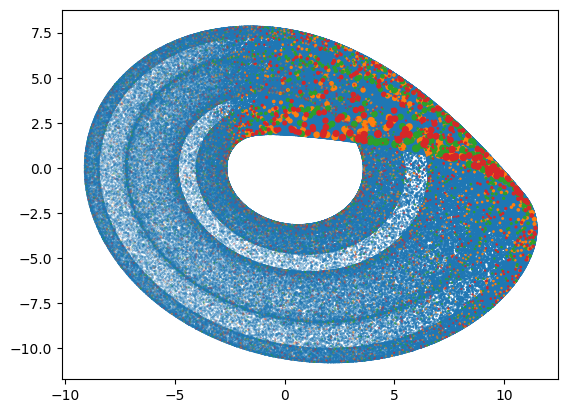

In [13]:
fig = plt.figure(figsize=())
plt.scatter(train[0, :], train[1, :], train[2, :])
plt.scatter(test[1][0, :], test[1][1, :], test[1][2, :])
plt.scatter(test[0][0, :], test[0][1, :], test[0][2, :])
plt.scatter(test[2][0, :], test[2][1, :], test[2][2, :])

In [4]:
len(test)

500

In [9]:
(1/0.071)*0.02

0.28169014084507044

Time taken by sample is 0.0218 seconds


Text(0.5, 1.0, 'mean forecast time = 5.36')

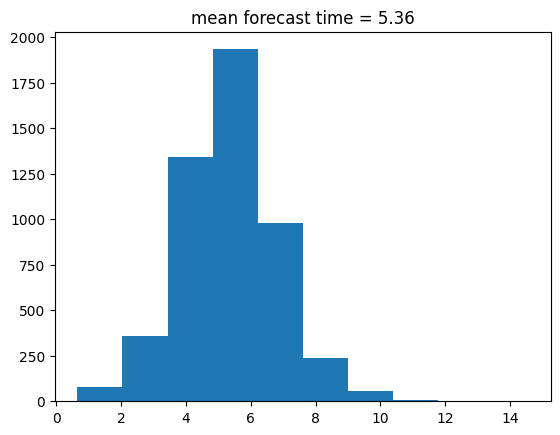

In [29]:
repo = '..'
L63_data_folder = '{}/data/L63-trajectories'.format(repo)
train = np.load('{}/train.npy'.format(L63_data_folder))
Wb = sm.GoodRowSampler(0.4, 3.5, train).sample(D_r)
test = np.load('{}/test.npy'.format(L63_data_folder))[:, :800, :]
rf = sr.SurrogateModel_LR(D=3, D_r=D_r, W_in_fn=Wb[:, :-1], b_in_fn=Wb[:, -1])
rf.compute_W(train, 4e-5)
a, b, c, d = rf.compute_forecast_time(test, 0.05, 0.02, Lyapunov_time=1/0.91)
plt.hist(a)
plt.title(f'mean forecast time = {a.mean():.2f}')

In [17]:
a.shape

(500,)

(array([331., 107.,  31.,   7.,  10.,   5.,   5.,   2.,   0.,   2.]),
 array([0.00071, 0.00284, 0.00497, 0.0071 , 0.00923, 0.01136, 0.01349,
        0.01562, 0.01775, 0.01988, 0.02201]),
 <BarContainer object of 10 artists>)

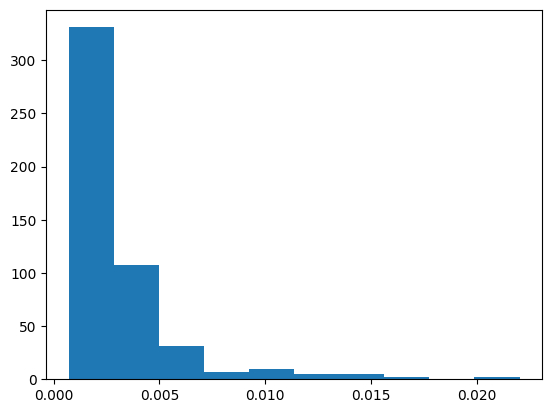

In [21]:
repo = '..'
Rossler_data_folder = '{}/data/Rossler-trajectories'.format(repo)
train = np.load('{}/train_20000.npy'.format(Rossler_data_folder))
Wb = np.random.uniform([-5., -5., -5., -2.], [5., 5., 5., 2.], size=(300, 3+1))
test = np.load('{}/test.npy'.format(Rossler_data_folder))
rf = sr.SurrogateModel_LR(D=3, D_r=300, W_in_fn=Wb[:, :-1], b_in_fn=Wb[:, -1])
rf.compute_W(train, 4e-1)
a, b, c, d = rf.compute_forecast_time(test, 0.05, 0.01, Lyapunov_time=1/0.071)
plt.hist(a)

In [8]:
0.01*0.071

0.0007099999999999999

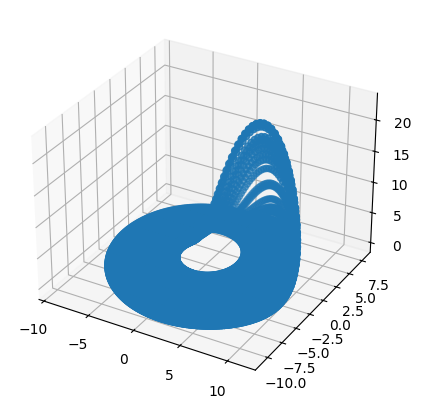

In [40]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(z[0, :], z[1, :], z[2, :])

(array([0.02911582, 0.03125812, 0.036906  , 0.04308946, 0.03522624,
        0.03140418, 0.03347345, 0.03361952, 0.03829363, 0.05141522,
        0.04832349, 0.04773923, 0.04803136, 0.04895644, 0.04844521,
        0.04939464, 0.05044145, 0.05122047, 0.05759868, 0.05847508,
        0.07186446, 0.06327091, 0.05679532, 0.0570631 , 0.06086082,
        0.06894314, 0.06925961, 0.07132888, 0.07517528, 0.07563783,
        0.09221631, 0.10942775, 0.08734745, 0.07865652, 0.07317905,
        0.06894314, 0.06526714, 0.06241886, 0.05991139, 0.05842639,
        0.05621105, 0.05582154, 0.053874  , 0.05314367, 0.05204817,
        0.05170735, 0.05158563, 0.05007628, 0.05061186, 0.05109874,
        0.04997891, 0.05022235, 0.05131784, 0.05114743, 0.05187776,
        0.05170735, 0.05367924, 0.0543122 , 0.0572822 , 0.05922975,
        0.06422034, 0.07797488, 0.07320339, 0.06356304, 0.05350883,
        0.05185342, 0.05307063, 0.04890775, 0.04790964, 0.04898079,
        0.04618119, 0.03931609, 0.03934043, 0.03

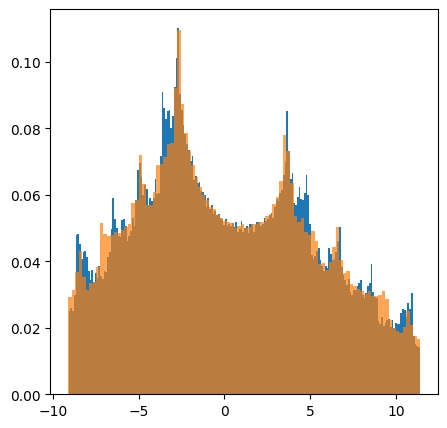

In [50]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)
ax.hist(z[0, :], bins=200, density=True)
ax.hist(train[0, :], bins=100, alpha=0.7, density=True)

(array([0.02291876, 0.02318713, 0.02882289, 0.02565613, 0.02624654,
        0.0304331 , 0.02909125, 0.03429762, 0.03848419, 0.03574682,
        0.03236536, 0.02930595, 0.02898391, 0.02882289, 0.02565613,
        0.02624654, 0.02758839, 0.02898391, 0.02914493, 0.02764206,
        0.02952065, 0.03268741, 0.03295578, 0.03488804, 0.04594486,
        0.04406627, 0.04191932, 0.04234871, 0.03918195, 0.03880623,
        0.04111421, 0.04283177, 0.03982604, 0.0390746 , 0.04224136,
        0.04143625, 0.04170462, 0.04004073, 0.04165095, 0.0429928 ,
        0.04138258, 0.04143625, 0.04326116, 0.0427781 , 0.04208034,
        0.04454934, 0.04315382, 0.04948734, 0.05066816, 0.04551547,
        0.04798447, 0.05308349, 0.05480105, 0.06408664, 0.06349623,
        0.05356655, 0.05201001, 0.05088286, 0.04707201, 0.04793079,
        0.0487359 , 0.0477161 , 0.04980938, 0.04905795, 0.0536739 ,
        0.05807516, 0.05973905, 0.05990007, 0.05764577, 0.05888027,
        0.05925599, 0.06183233, 0.06258377, 0.06

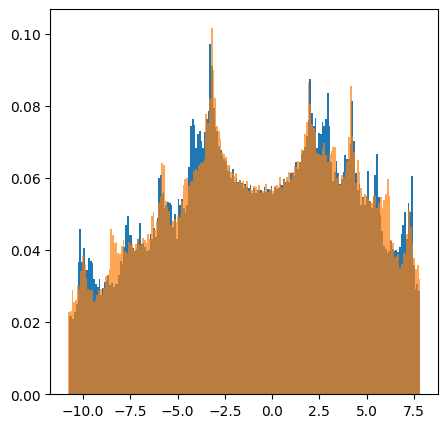

In [51]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)
ax.hist(z[1, :], bins=200, density=True)
ax.hist(train[1, :], bins=200, alpha=0.7, density=True)

(array([6.19396129e+00, 5.70216994e-01, 2.44209812e-01, 1.77388192e-01,
        1.50896004e-01, 9.87874011e-02, 7.62361992e-02, 7.11567052e-02,
        5.28530112e-02, 4.68101648e-02, 4.22999244e-02, 3.77896840e-02,
        3.41990072e-02, 3.06521191e-02, 2.80685834e-02, 2.66235549e-02,
        2.39524417e-02, 2.43903291e-02, 2.18943708e-02, 2.07120748e-02,
        1.90043139e-02, 1.74717079e-02, 1.78658066e-02, 1.71213980e-02,
        1.52822708e-02, 1.63769894e-02, 1.51509046e-02, 1.33993549e-02,
        1.46254397e-02, 1.36182986e-02, 1.19981152e-02, 1.09909742e-02,
        1.23484251e-02, 1.12099179e-02, 1.02903543e-02, 1.14726503e-02,
        1.05968755e-02, 1.15164390e-02, 9.58973442e-03, 9.76488938e-03,
        9.89625561e-03, 8.67017084e-03, 8.27607217e-03, 8.97669204e-03,
        8.84532581e-03, 8.05712846e-03, 7.75060727e-03, 7.13756489e-03,
        8.31986091e-03, 7.75060727e-03, 8.10091720e-03, 7.13756489e-03,
        7.96955098e-03, 6.26179005e-03, 7.79439601e-03, 7.093776

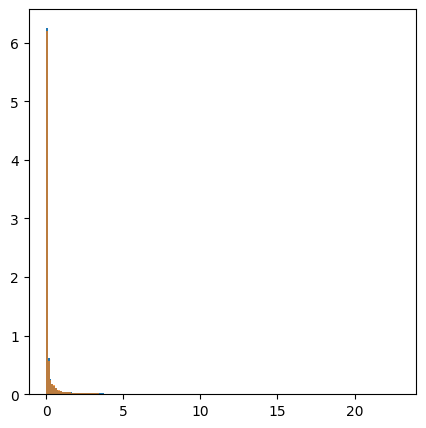

In [52]:
fig = plt.figure(figsize=(5,5))
ax  = fig.add_subplot(111)
ax.hist(z[2, :], bins=200, density=True)
ax.hist(train[2, :], bins=200, alpha=0.7, density=True)